# **Stock Price Prediction using Linear Regression**
#### By: Kelvin Tirkey
---

Prediction of stock prices is an puzzling task which many try to do. Spot-on accuracy may not be practical but sometimes even simple linear models can be surprisingly close. In this project, I'll apply a linear regression model using Python. The regression model will be using historic pricing data and technical indicators to make predictions on future prices.

## Data Extraction
---

We start the project by downloading the dataset and appropriate libraries into the Python IDE.

In [ ]:
!pip install numpy --upgrade --q
!pip install pandas --upgrade --q
!pip install matplotlib==3.1.3 --upgrade --q
!pip install seaborn --upgrade --q
!pip install sklearn --upgrade --q

In [ ]:
!pip install opendatasets --upgrade --q

In [ ]:
import opendatasets as od
import os

od.download('https://www.kaggle.com/datasets/rohanrao/nifty50-stock-market-data')
os.listdir('nifty50-stock-market-data')

Please provide your Kaggle credentials to download this dataset. Learn more: http://bit.ly/kaggle-creds
Your Kaggle username: kelvintirkey
Your Kaggle Key: ··········


100%|██████████| 18.4M/18.4M [00:00<00:00, 92.6MB/s]


['TITAN.csv',
 'ONGC.csv',
 'ULTRACEMCO.csv',
 'HDFCBANK.csv',
 'RELIANCE.csv',
 'HDFC.csv',
 'NESTLEIND.csv',
 'WIPRO.csv',
 'COALINDIA.csv',
 'ASIANPAINT.csv',
 'BAJFINANCE.csv',
 'MARUTI.csv',
 'INFY.csv',
 'ICICIBANK.csv',
 'HCLTECH.csv',
 'HEROMOTOCO.csv',
 'EICHERMOT.csv',
 'DRREDDY.csv',
 'ITC.csv',
 'TATAMOTORS.csv',
 'BHARTIARTL.csv',
 'BAJAJ-AUTO.csv',
 'NTPC.csv',
 'TECHM.csv',
 'BRITANNIA.csv',
 'TATASTEEL.csv',
 'IOC.csv',
 'stock_metadata.csv',
 'GAIL.csv',
 'ZEEL.csv',
 'MM.csv',
 'ADANIPORTS.csv',
 'UPL.csv',
 'SBIN.csv',
 'KOTAKBANK.csv',
 'CIPLA.csv',
 'TCS.csv',
 'BPCL.csv',
 'INDUSINDBK.csv',
 'JSWSTEEL.csv',
 'SHREECEM.csv',
 'POWERGRID.csv',
 'AXISBANK.csv',
 'GRASIM.csv',
 'SUNPHARMA.csv',
 'LT.csv',
 'VEDL.csv',
 'HINDUNILVR.csv',
 'HINDALCO.csv',
 'NIFTY50_all.csv',
 'INFRATEL.csv',
 'BAJAJFINSV.csv']

Now, we start importing essential library to Python IDE for various numerical, tabular and graphical operations on the dataset.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from pylab import rcParams
import numpy as np
import seaborn as sns
%matplotlib inline

**About the Dataset -**

The dataset has around 12 features. All of these features have something to offer for forcasting. Some tells us about the trend, some gives us a signal if the stock is overbought or oversold, some portrays the strength of the price trend.

I will use the Titan Stock Data for this project.

In [ ]:
df_stock = pd.read_csv('nifty50-stock-market-data/TITAN.csv')
df_stock

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2000-01-03,TITAN,EQ,144.95,146.0,156.45,146.00,155.00,155.70,154.36,23000,3.550370e+11,NaN,NaN,NaN
1,2000-01-04,TITAN,EQ,155.70,152.0,152.00,144.00,148.05,147.40,146.72,26300,3.858700e+11,NaN,NaN,NaN
2,2000-01-05,TITAN,EQ,147.40,144.0,148.80,136.00,139.95,138.40,142.95,20600,2.944850e+11,NaN,NaN,NaN
3,2000-01-06,TITAN,EQ,138.40,142.0,149.50,141.00,149.50,149.50,147.87,31600,4.672750e+11,NaN,NaN,NaN
4,2000-01-07,TITAN,EQ,149.50,149.5,153.00,145.00,147.75,146.35,148.63,36600,5.439965e+11,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,228386.0,0.2238
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,298862.0,0.2608
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,212098.0,0.2044
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,1927546,2.911181e+14,63568.0,492144.0,0.2553


In [ ]:
df_stock.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble'],
      dtype='object')

This is an important step, to define the Date column as datetime64 data type for easier and faster observations.

In [ ]:
df_stock['Date'] = pd.to_datetime(df_stock.Date)
df_stock['Date']

0      2000-01-03
1      2000-01-04
2      2000-01-05
3      2000-01-06
4      2000-01-07
          ...    
5301   2021-04-26
5302   2021-04-27
5303   2021-04-28
5304   2021-04-29
5305   2021-04-30
Name: Date, Length: 5306, dtype: datetime64[ns]

## Plot Time Series Chart for TITAN
---

In [ ]:
import matplotlib 
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (12,8)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

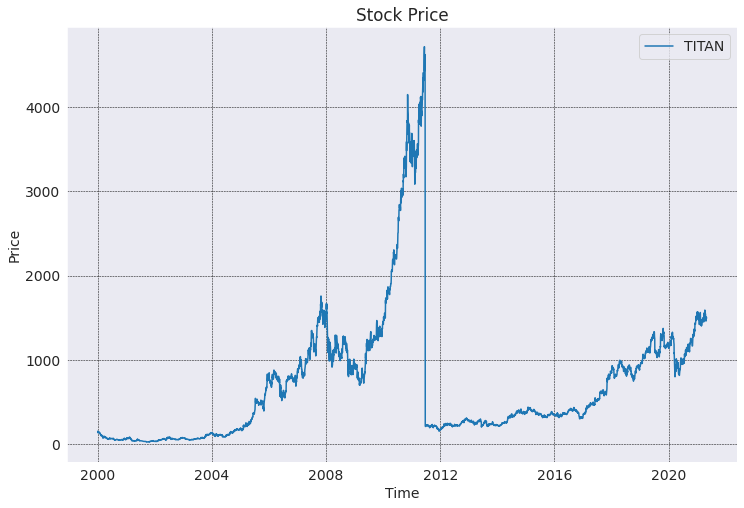

In [ ]:
plt.plot(df_stock.Date, df_stock.Close)
plt.title("Stock Price")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['TITAN'])
plt.grid(which="major", color='k', linestyle='--', linewidth=0.5)
plt.show()

Since there was a split in Titan's stock in June 2011, we decide to only consider the stock prices after August 2011.

In [ ]:
df_stock_12 = df_stock[df_stock.Date>='2011-08-01']
df_stock_12.head()

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2893,2011-08-01,TITAN,EQ,228.25,228.5,230.90,226.25,227.25,228.05,228.66,1791974,4.097546e+13,19353.0,612582.0,0.3418
2894,2011-08-02,TITAN,EQ,228.05,227.5,229.60,226.75,229.25,228.80,228.49,1969199,4.499351e+13,27558.0,688946.0,0.3499
2895,2011-08-03,TITAN,EQ,228.80,227.2,228.95,222.00,225.05,225.15,225.04,2320358,5.221638e+13,23953.0,482350.0,0.2079
2896,2011-08-04,TITAN,EQ,225.15,225.2,227.40,222.60,223.00,223.20,225.17,1630570,3.671572e+13,17015.0,486439.0,0.2983
2897,2011-08-05,TITAN,EQ,223.20,218.0,219.15,205.55,214.10,213.95,212.44,5267450,1.119004e+14,52098.0,1423907.0,0.2703


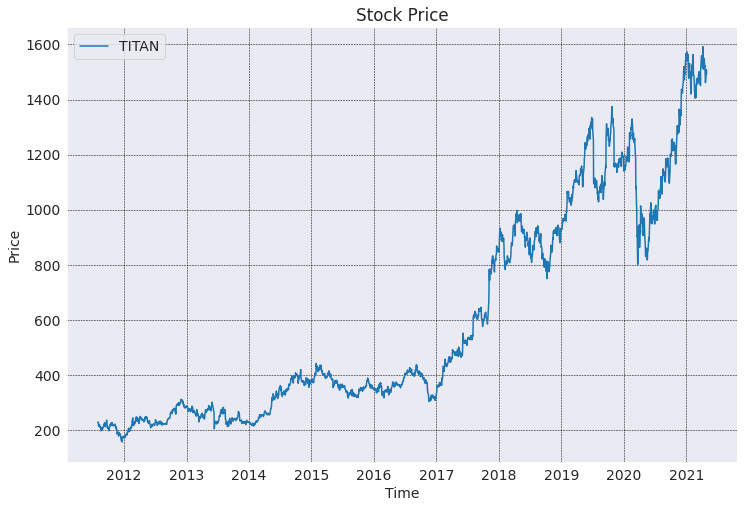

In [ ]:
plt.plot(df_stock_12.Date,df_stock_12.Close)
plt.title("Stock Price")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['TITAN'])
plt.grid(which="major", color='k', linestyle='--', linewidth=0.5)
plt.show()

## Data Cleaning and Preparation

---



This is the dataset we will be using for Linear Regression.

In [ ]:
df_stock_12

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
2893,2011-08-01,TITAN,EQ,228.25,228.5,230.90,226.25,227.25,228.05,228.66,1791974,4.097546e+13,19353.0,612582.0,0.3418
2894,2011-08-02,TITAN,EQ,228.05,227.5,229.60,226.75,229.25,228.80,228.49,1969199,4.499351e+13,27558.0,688946.0,0.3499
2895,2011-08-03,TITAN,EQ,228.80,227.2,228.95,222.00,225.05,225.15,225.04,2320358,5.221638e+13,23953.0,482350.0,0.2079
2896,2011-08-04,TITAN,EQ,225.15,225.2,227.40,222.60,223.00,223.20,225.17,1630570,3.671572e+13,17015.0,486439.0,0.2983
2897,2011-08-05,TITAN,EQ,223.20,218.0,219.15,205.55,214.10,213.95,212.44,5267450,1.119004e+14,52098.0,1423907.0,0.2703
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,228386.0,0.2238
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,298862.0,0.2608
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,212098.0,0.2044
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,1927546,2.911181e+14,63568.0,492144.0,0.2553


Adding some more features related to date which will help to increase the accuracy for our LR model.

In [ ]:
df_stock_12['year'] = pd.DatetimeIndex(df_stock_12.Date).year
df_stock_12['month'] = pd.DatetimeIndex(df_stock_12.Date).month
df_stock_12['day'] = pd.DatetimeIndex(df_stock_12.Date).day
df_stock_12['dayofweek'] = pd.DatetimeIndex(df_stock_12.Date).weekday
df_stock_12['dayofyear'] = pd.DatetimeIndex(df_stock_12.Date).dayofyear
df_stock_12['weekofyear'] = pd.DatetimeIndex(df_stock_12.Date).week
df_stock_12['quarter'] = pd.DatetimeIndex(df_stock_12.Date).quarter
df_stock_12['is_month_end'] = pd.DatetimeIndex(df_stock_12.Date).is_month_end*1
df_stock_12['is_month_start'] = pd.DatetimeIndex(df_stock_12.Date).is_month_start*1
df_stock_12['is_quarter_end'] = pd.DatetimeIndex(df_stock_12.Date).is_quarter_end*1
df_stock_12['is_quarter_start'] = pd.DatetimeIndex(df_stock_12.Date).is_quarter_start*1
df_stock_12['is_year_end'] = pd.DatetimeIndex(df_stock_12.Date).is_year_end*1
df_stock_12['is_year_start'] = pd.DatetimeIndex(df_stock_12.Date).is_year_start*1
df_stock_12['is_leap_year'] = pd.DatetimeIndex(df_stock_12.Date).is_leap_year*1

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documen

This is how our dataset look after adding these features.

In [ ]:
df_stock_12

,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,...,dayofyear,weekofyear,quarter,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,is_leap_year
2893,2011-08-01,TITAN,EQ,228.25,228.5,230.90,226.25,227.25,228.05,228.66,...,213,31,3,0,1,0,0,0,0,0
2894,2011-08-02,TITAN,EQ,228.05,227.5,229.60,226.75,229.25,228.80,228.49,...,214,31,3,0,0,0,0,0,0,0
2895,2011-08-03,TITAN,EQ,228.80,227.2,228.95,222.00,225.05,225.15,225.04,...,215,31,3,0,0,0,0,0,0,0
2896,2011-08-04,TITAN,EQ,225.15,225.2,227.40,222.60,223.00,223.20,225.17,...,216,31,3,0,0,0,0,0,0,0
2897,2011-08-05,TITAN,EQ,223.20,218.0,219.15,205.55,214.10,213.95,212.44,...,217,31,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5301,2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,...,116,17,2,0,0,0,0,0,0,0
5302,2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,...,117,17,2,0,0,0,0,0,0,0
5303,2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,...,118,17,2,0,0,0,0,0,0,0
5304,2021-04-29,TITAN,EQ,1508.85,1524.0,1527.50,1497.00,1504.35,1506.80,1510.30,...,119,17,2,0,0,0,0,0,0,0


Let's get some more information related to our dataset.

In [ ]:
df_stock_12.columns

Index(['Date', 'Symbol', 'Series', 'Prev Close', 'Open', 'High', 'Low', 'Last',
       'Close', 'VWAP', 'Volume', 'Turnover', 'Trades', 'Deliverable Volume',
       '%Deliverble', 'year', 'month', 'day', 'dayofweek', 'dayofyear',
       'weekofyear', 'quarter', 'is_month_end', 'is_month_start',
       'is_quarter_end', 'is_quarter_start', 'is_year_end', 'is_year_start',
       'is_leap_year'],
      dtype='object')

In [ ]:
df_stock_12.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2413 entries, 2893 to 5305
Data columns (total 29 columns):
 #   Column              Non-Null Count  Dtype         
---  ------              --------------  -----         
 0   Date                2413 non-null   datetime64[ns]
 1   Symbol              2413 non-null   object        
 2   Series              2413 non-null   object        
 3   Prev Close          2413 non-null   float64       
 4   Open                2413 non-null   float64       
 5   High                2413 non-null   float64       
 6   Low                 2413 non-null   float64       
 7   Last                2413 non-null   float64       
 8   Close               2413 non-null   float64       
 9   VWAP                2413 non-null   float64       
 10  Volume              2413 non-null   int64         
 11  Turnover            2413 non-null   float64       
 12  Trades              2413 non-null   float64       
 13  Deliverable Volume  2413 non-null   float64  

In [ ]:
df_stock_12.describe()

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,dayofyear,weekofyear,quarter,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,is_leap_year
count,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2.413000e+03,2.413000e+03,2413.000000,...,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000,2413.000000
mean,597.070224,597.893514,606.350166,588.761998,597.596685,597.593804,597.717915,2.153013e+06,1.398535e+14,47245.014090,...,182.694157,26.551181,2.501450,0.033568,0.031082,0.010361,0.011604,0.002901,0.003315,0.310816
std,391.266577,391.918599,396.591030,386.724225,391.713056,391.617992,391.661332,2.048672e+06,1.762399e+14,43548.848243,...,106.876194,15.269537,1.127679,0.180152,0.173574,0.101279,0.107116,0.053793,0.057496,0.462924
min,156.200000,158.000000,163.700000,154.200000,156.300000,156.200000,157.560000,5.207000e+04,1.329470e+12,993.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,275.000000,275.000000,278.700000,270.000000,275.450000,275.000000,274.350000,1.008311e+06,3.428769e+13,18000.000000,...,88.000000,13.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,389.300000,390.500000,395.600000,384.300000,389.400000,389.600000,390.100000,1.631191e+06,6.752963e+13,34745.000000,...,184.000000,27.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,923.800000,925.000000,935.500000,910.550000,924.700000,924.400000,923.900000,2.632971e+06,1.945470e+14,63568.000000,...,276.000000,40.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1592.000000,1578.000000,1621.350000,1561.850000,1594.600000,1592.000000,1597.470000,3.327661e+07,2.451345e+15,536406.000000,...,366.000000,53.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


If we consider 'Close' as the dependent variable in the LR model. We can find the correlation with other independent variables in dataset. This help us to find the how the dependent variable is changing wrt other variables.

In [ ]:
df_stock_12.corrwith(df_stock_12.Close,axis=0)

Prev Close            0.999307
Open                  0.999440
High                  0.999783
Low                   0.999716
Last                  0.999987
Close                 1.000000
VWAP                  0.999904
Volume                0.139843
Turnover              0.628013
Trades                0.543332
Deliverable Volume    0.012108
%Deliverble          -0.237112
year                  0.908765
month                -0.047008
day                  -0.000440
dayofweek             0.004201
dayofyear            -0.046739
weekofyear           -0.042066
quarter              -0.044610
is_month_end         -0.003598
is_month_start        0.010175
is_quarter_end        0.005990
is_quarter_start      0.019930
is_year_end           0.014673
is_year_start         0.017724
is_leap_year         -0.029921
dtype: float64

Remove some of the columns which are not required.

In [ ]:
df_stock_12.set_index('Date',inplace=True)
df_stock_12

,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,...,dayofyear,weekofyear,quarter,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,is_leap_year
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-01,TITAN,EQ,228.25,228.5,230.90,226.25,227.25,228.05,228.66,1791974,...,213,31,3,0,1,0,0,0,0,0
2011-08-02,TITAN,EQ,228.05,227.5,229.60,226.75,229.25,228.80,228.49,1969199,...,214,31,3,0,0,0,0,0,0,0
2011-08-03,TITAN,EQ,228.80,227.2,228.95,222.00,225.05,225.15,225.04,2320358,...,215,31,3,0,0,0,0,0,0,0
2011-08-04,TITAN,EQ,225.15,225.2,227.40,222.60,223.00,223.20,225.17,1630570,...,216,31,3,0,0,0,0,0,0,0
2011-08-05,TITAN,EQ,223.20,218.0,219.15,205.55,214.10,213.95,212.44,5267450,...,217,31,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,TITAN,EQ,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,...,116,17,2,0,0,0,0,0,0,0
2021-04-27,TITAN,EQ,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,...,117,17,2,0,0,0,0,0,0,0
2021-04-28,TITAN,EQ,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,...,118,17,2,0,0,0,0,0,0,0


In [ ]:
df_Stock = df_stock_12.drop(columns=['Symbol','Series'])
df_Stock

,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,...,dayofyear,weekofyear,quarter,is_month_end,is_month_start,is_quarter_end,is_quarter_start,is_year_end,is_year_start,is_leap_year
Date,,,,,,,,,,,,,,,,,,,,,
2011-08-01,228.25,228.5,230.90,226.25,227.25,228.05,228.66,1791974,4.097546e+13,19353.0,...,213,31,3,0,1,0,0,0,0,0
2011-08-02,228.05,227.5,229.60,226.75,229.25,228.80,228.49,1969199,4.499351e+13,27558.0,...,214,31,3,0,0,0,0,0,0,0
2011-08-03,228.80,227.2,228.95,222.00,225.05,225.15,225.04,2320358,5.221638e+13,23953.0,...,215,31,3,0,0,0,0,0,0,0
2011-08-04,225.15,225.2,227.40,222.60,223.00,223.20,225.17,1630570,3.671572e+13,17015.0,...,216,31,3,0,0,0,0,0,0,0
2011-08-05,223.20,218.0,219.15,205.55,214.10,213.95,212.44,5267450,1.119004e+14,52098.0,...,217,31,3,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-04-26,1461.45,1470.0,1489.75,1465.15,1478.95,1479.85,1479.58,1020499,1.509913e+14,39416.0,...,116,17,2,0,0,0,0,0,0,0
2021-04-27,1479.85,1485.0,1503.55,1482.00,1498.00,1495.10,1494.21,1145908,1.712228e+14,42363.0,...,117,17,2,0,0,0,0,0,0,0
2021-04-28,1495.10,1505.0,1514.90,1491.70,1509.00,1508.85,1504.73,1037771,1.561564e+14,37985.0,...,118,17,2,0,0,0,0,0,0,0


## Test Train Set

---



We will be using 'Close' column as the target which we will be predicting using the other features.

We will dividing the dataset into three sub dataset which is will used to train (88%), validate (10%) and test (1%) the LR model.

In [ ]:
def create_train_test_set(df_Stock):
    
    features = df_Stock.drop(columns=['Close'], axis=1)
    target = df_Stock['Close']
    

    data_len = df_Stock.shape[0]
    print('Stock Data length is - ', str(data_len))

    train_split = int(data_len * 0.88)
    print('Training Set length - ', str(train_split))

    val_split = train_split + int(data_len * 0.1)
    print('Validation Set length - ', str(int(data_len * 0.1)))

    print('Test Set length - ', str(int(data_len * 0.02)))

    X_train, X_val, X_test = features[:train_split], features[train_split:val_split], features[val_split:]
    Y_train, Y_val, Y_test = target[:train_split], target[train_split:val_split], target[val_split:]
    
    print(X_train.shape, X_val.shape, X_test.shape)
    print(Y_train.shape, Y_val.shape, Y_test.shape)
    
    return X_train, X_val, X_test, Y_train, Y_val, Y_test

In [ ]:
X_train, X_val, X_test, Y_train, Y_val, Y_test = create_train_test_set(df_Stock)

Stock Data length is -  2413
Training Set length -  2123
Validation Set length -  241
Test Set length -  48
(2123, 25) (241, 25) (49, 25)
(2123,) (241,) (49,)


## Linear Regression

---



Now, we will be performing prediction of close of Titan stock prices using Linear Regression.

In [ ]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, Y_train)


coeff_df = pd.DataFrame(lr.coef_, X_test.columns, columns=['Coefficient'])
print('\nLR Coefficient: \n',coeff_df)
print('\nLR Intercept: ', lr.intercept_)


LR Coefficient: 
                      Coefficient
Prev Close          1.556103e-04
Open               -4.473519e-02
High               -3.805603e-03
Low                -1.036816e-02
Last                8.246056e-01
VWAP                2.333088e-01
Volume             -5.058473e-08
Turnover            8.376400e-16
Trades             -1.819312e-06
Deliverable Volume  1.415292e-07
%Deliverble        -2.898374e-01
year                7.459603e-02
month               5.443087e-03
day                 6.682217e-04
dayofweek          -4.336258e-03
dayofyear           2.223525e-03
weekofyear         -8.614515e-03
quarter            -8.120843e-02
is_month_end       -3.020142e-01
is_month_start     -1.167826e-01
is_quarter_end      2.724577e-01
is_quarter_start   -1.659723e-02
is_year_end        -7.276600e-01
is_year_start      -3.001816e-02
is_leap_year        1.107716e-01

LR Intercept:  -149.9006307131882


Evaluation:

In [ ]:
print("Performance (R^2): ", round(lr.score(X_train, Y_train),8))

Performance (R^2):  0.99998285


In [ ]:
Y_train_pred = lr.predict(X_train)
Y_val_pred = lr.predict(X_val)
Y_test_pred = lr.predict(X_test)

In [ ]:
from sklearn import metrics

In [ ]:
print("Training R-squared: ",round(metrics.r2_score(Y_train,Y_train_pred),3))
print('Training MMSE:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 3)) 
print("Training RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_train,Y_train_pred)),3))

print('\n')

print("Validation R-squared: ",round(metrics.r2_score(Y_val,Y_val_pred),3))
print('Validation MMSE:', round(metrics.mean_squared_error(Y_train,Y_train_pred), 3)) 
print("Validation RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_val,Y_val_pred)),3))

print('\n')

print("Test R-squared: ",round(metrics.r2_score(Y_test,Y_test_pred),3))
print('Test MMSE:', round(metrics.mean_squared_error(Y_test,Y_test_pred), 3)) 
print("Test RMSE: ",round(np.sqrt(metrics.mean_squared_error(Y_test,Y_test_pred)),3))


Training R-squared:  1.0
Training MMSE: 1.834
Training RMSE:  1.354


Validation R-squared:  1.0
Validation MMSE: 1.834
Validation RMSE:  3.628


Test R-squared:  0.993
Test MMSE: 11.537
Test RMSE:  3.397


## Plotting Predicted vs Actual Prices 
---



In [ ]:
df_pred = pd.DataFrame(Y_val.values, columns=['Actual'], index=Y_val.index)
df_pred['Predicted'] = Y_val_pred
#df_pred = df_pred.reset_index()
#df_pred.loc[:, 'Date'] = pd.to_datetime(df_pred['Date'],format='%Y-%m-%d')
df_pred

,Actual,Predicted
Date,,
2020-02-28,1254.50,1254.896494
2020-03-02,1244.15,1253.170290
2020-03-03,1247.00,1248.308214
2020-03-04,1250.95,1250.020167
2020-03-05,1259.15,1255.544844
...,...,...
2021-02-09,1559.90,1564.184652
2021-02-10,1563.15,1576.650834
2021-02-11,1524.70,1524.229198


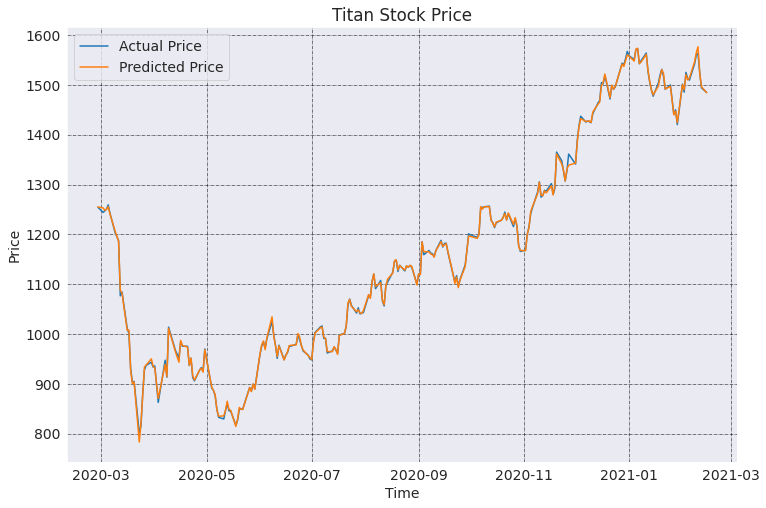

In [ ]:
#df_pred[['Actual', 'Predicted']].plot()

plt.plot(df_pred.Actual)
plt.plot(df_pred.Predicted)
plt.title("Titan Stock Price")
plt.ylabel('Price')
plt.xlabel('Time')
plt.legend(['Actual Price','Predicted Price'])
plt.grid(which="major", color='k', linestyle='-.', linewidth=0.5)
plt.show()